<a href="https://colab.research.google.com/github/mukherjee07/DeepLearning_NYU2020_Notes/blob/main/keras_autoencoder_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autoencoders are —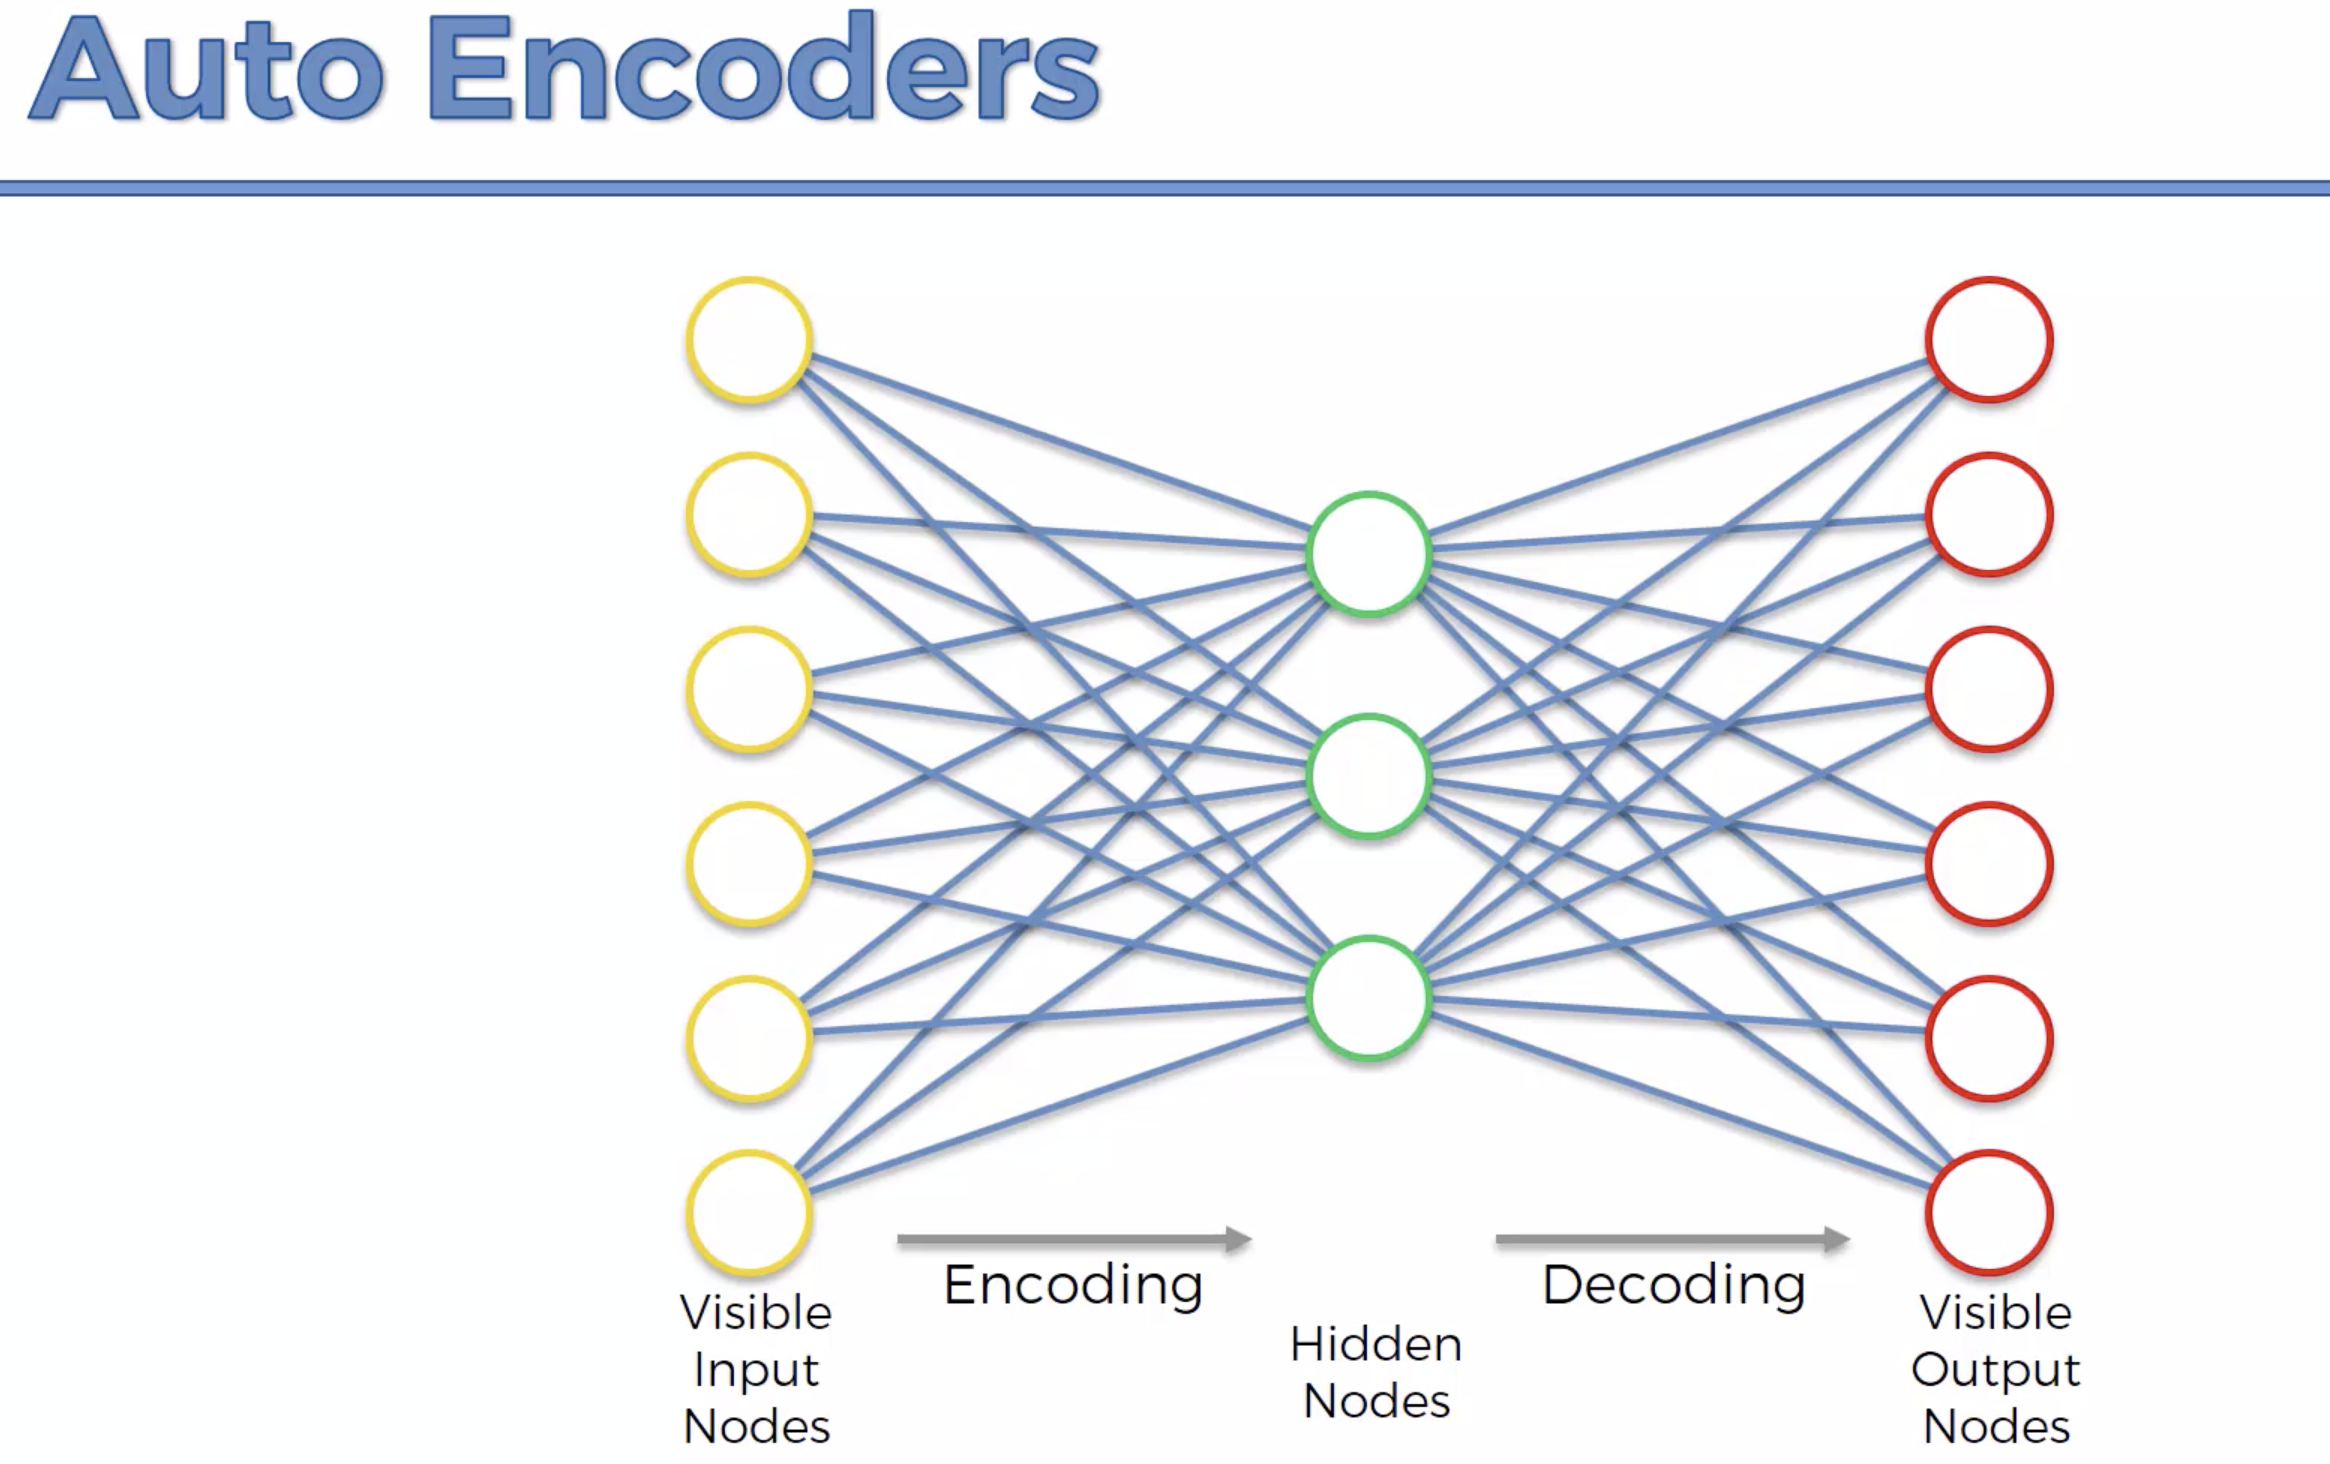 neural networks which encodes itself into a low-D latent space

Ref — https://www.udemy.com/course/deeplearning/learn/lecture/6866168#notes



*   Auto-encoders are self-supervised (no labels and targets are specified)
*   The goal to create encoders is to take up less space
* They should have a capacity to get back the original data using the encoder algorithm



Loss functions — Binary cross entropy, MSE, marginal log-likelihood

Steps to build an autoencoder:
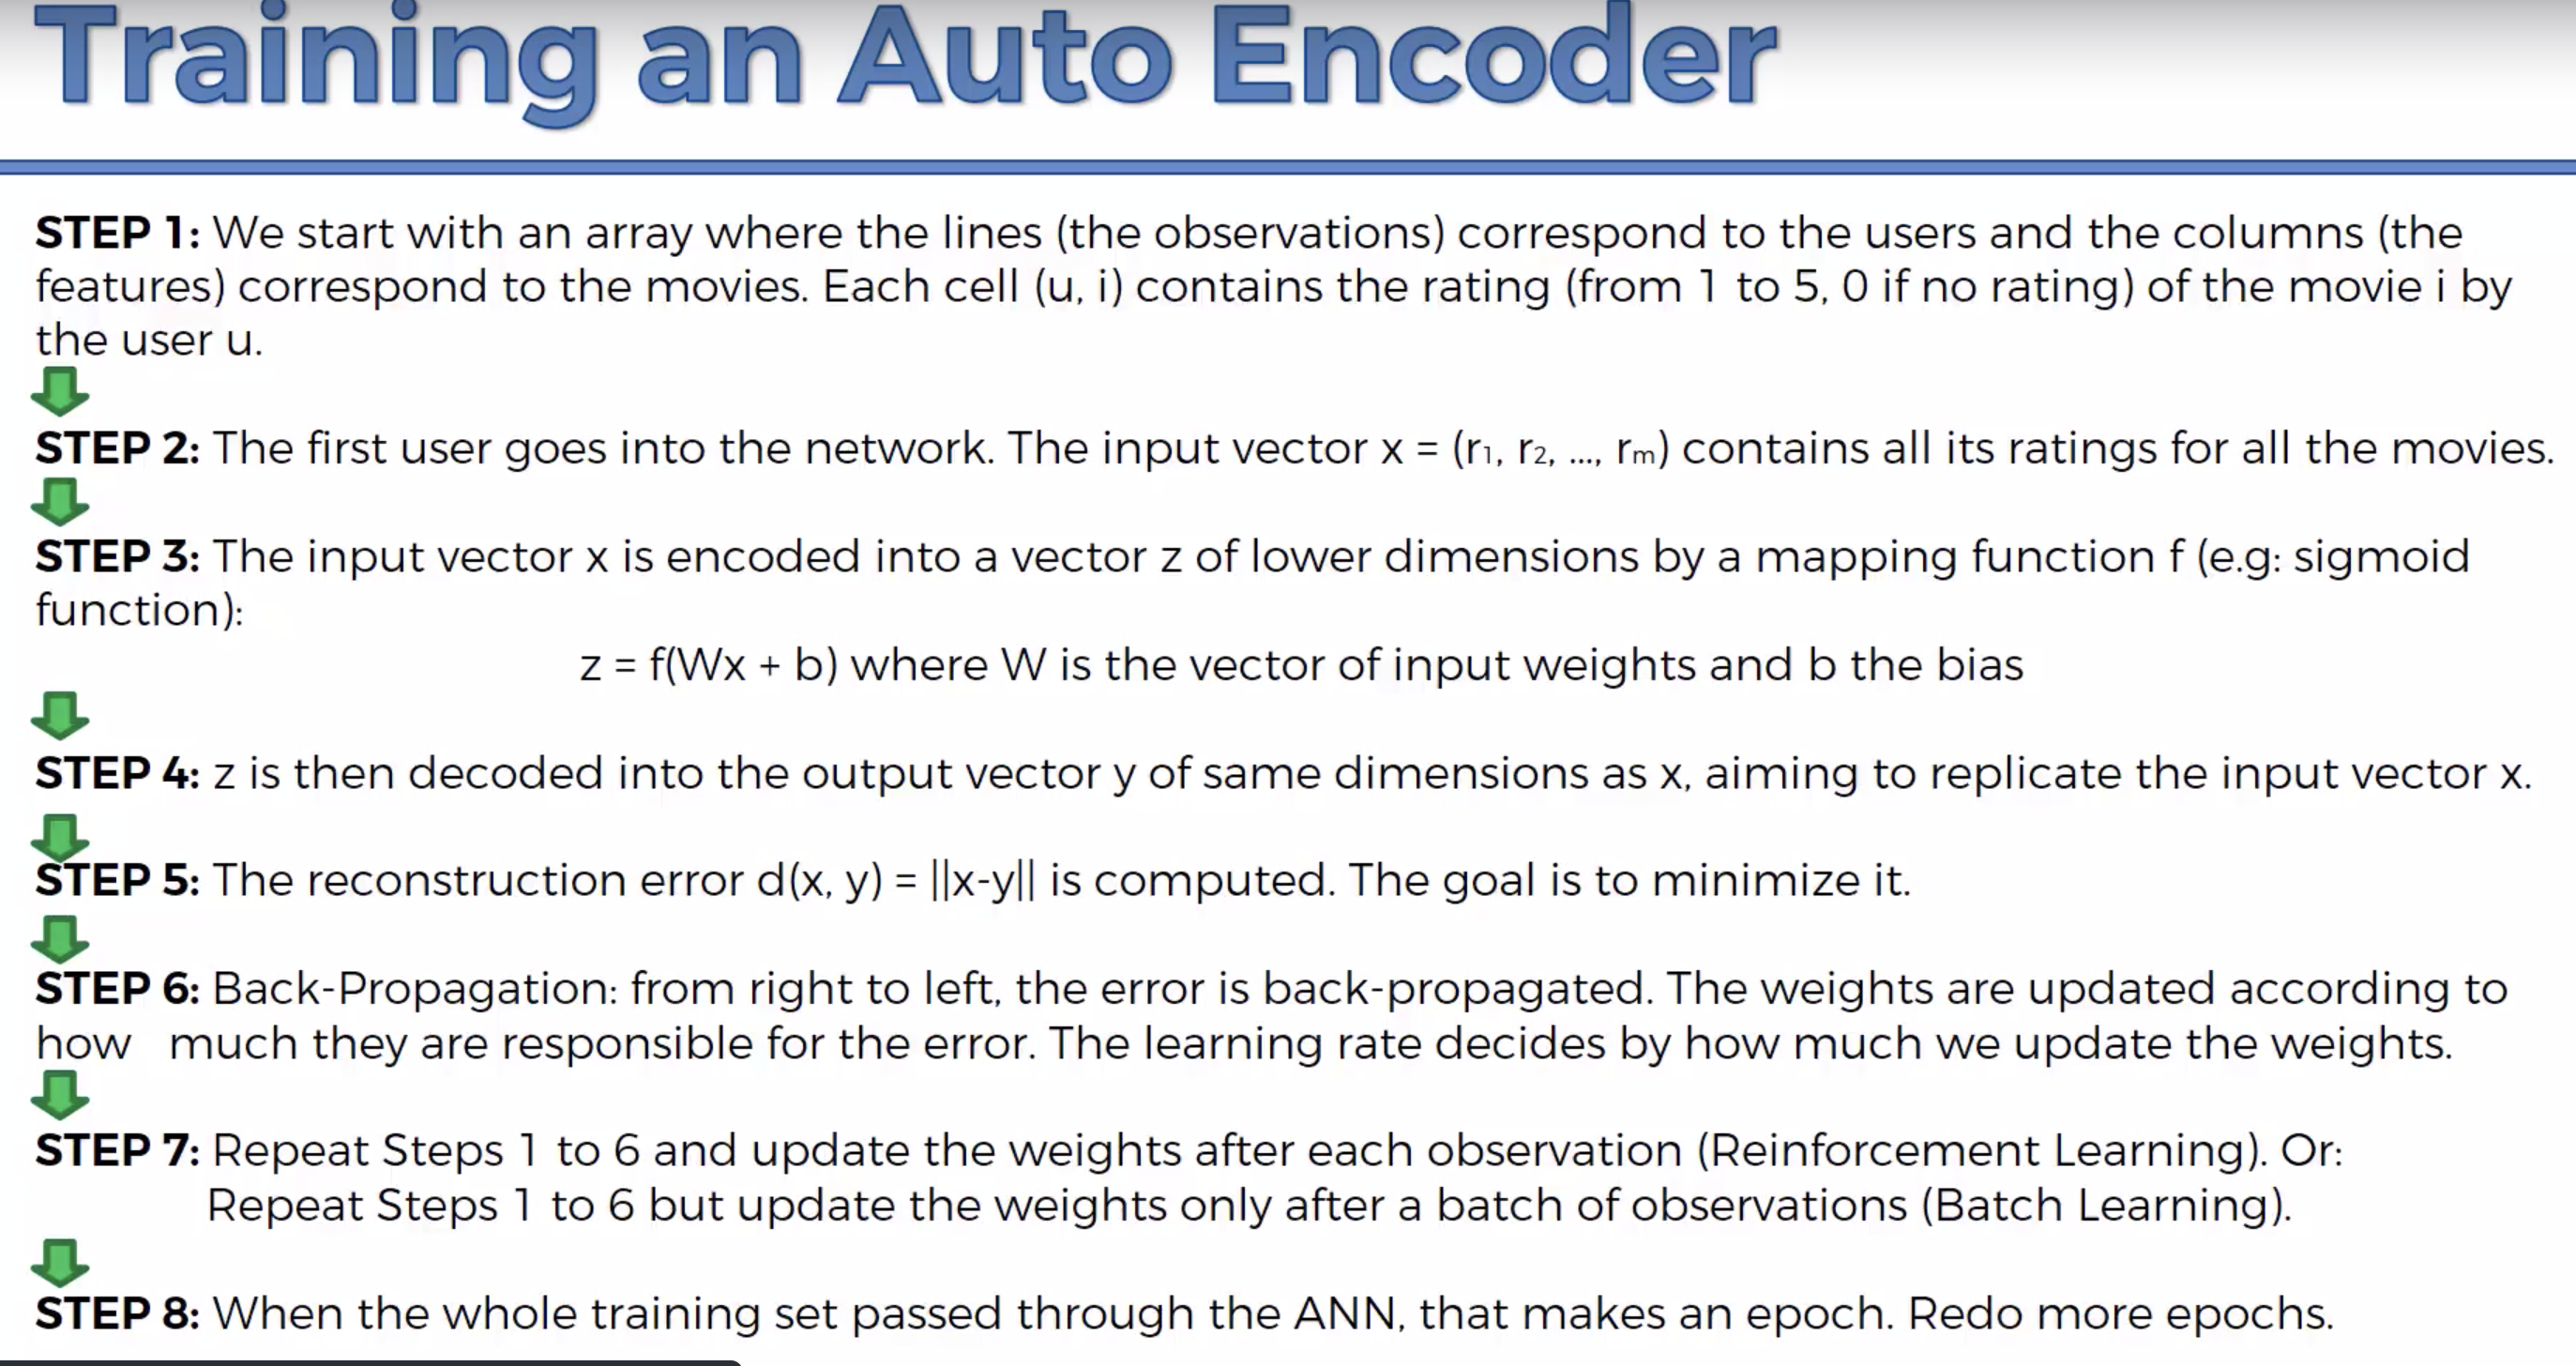

Example taken from —
https://blog.keras.io/building-autoencoders-in-keras.html

In [54]:
#Importing libraries
import keras
from keras import layers

# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))

In [15]:
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

In [16]:
# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

In [25]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

In [17]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [18]:
#configure our model to use a per-pixel binary crossentropy loss, and the Adam optimizer
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

Preparing our input data.

We're using MNIST digits, and we're discarding the labels (since we're only interested in encoding/decoding the input images).

MNIST - ~60,000 handwritten datasets

In [19]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

normalizing all values between 0 and 1 and flattening the 28x28 images into vectors of size 784

In [20]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


Training step for the autoencoder for 50 steps

In [21]:
autoencoder.fit(x_train, x_train,epochs=50,batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 4s 13ms/step - loss: 0.3869 - val_loss: 0.1917
Epoch 2/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1819 - val_loss: 0.1539
Epoch 3/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1495 - val_loss: 0.1342
Epoch 4/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1322 - val_loss: 0.1222
Epoch 5/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1213 - val_loss: 0.1139
Epoch 6/50
235/235 [==============================] - 2s 11ms/step - loss: 0.1137 - val_loss: 0.1082
Epoch 7/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1081 - val_loss: 0.1039
Epoch 8/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1043 - val_loss: 0.1007
Epoch 9/50
235/235 [==============================] - 2s 11ms/step - loss: 0.1012 - val_loss: 0.0983
Epoch 10/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0990 - val_lo

After 50 epochs, the autoencoder is reaching a stable train/validation loss value of about 0.09. We would try to visualize the reconstructed inputs and the encoded representations. 

We will use Matplotlib.

In [26]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

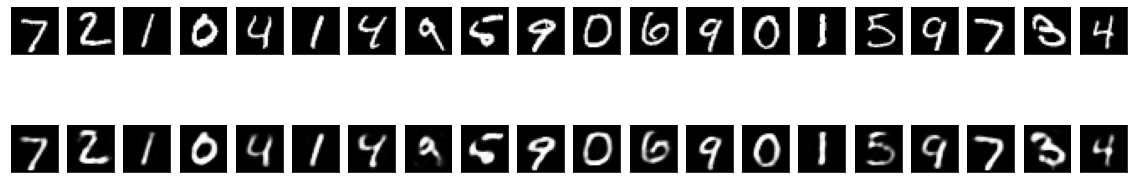

In [30]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 20  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Variational Auto-encoder (VAEs)


*   It is an autoencoder that learns a latent-variable model
*   Instead of letting your neural network learn an arbitrary function, you are learning the parameters of a probability distribution modeling your data
*   If you sample points from this distribution, you can generate new input data samples — a VAE is a "generative model".

Example — smVAE (supramolecular variational auto-encoder)

*Noh J, Kim J, Stein HS, et al. Inverse design of solid-State materials via a continuous representation. Matter. 2019;1(5):1370–1384.*
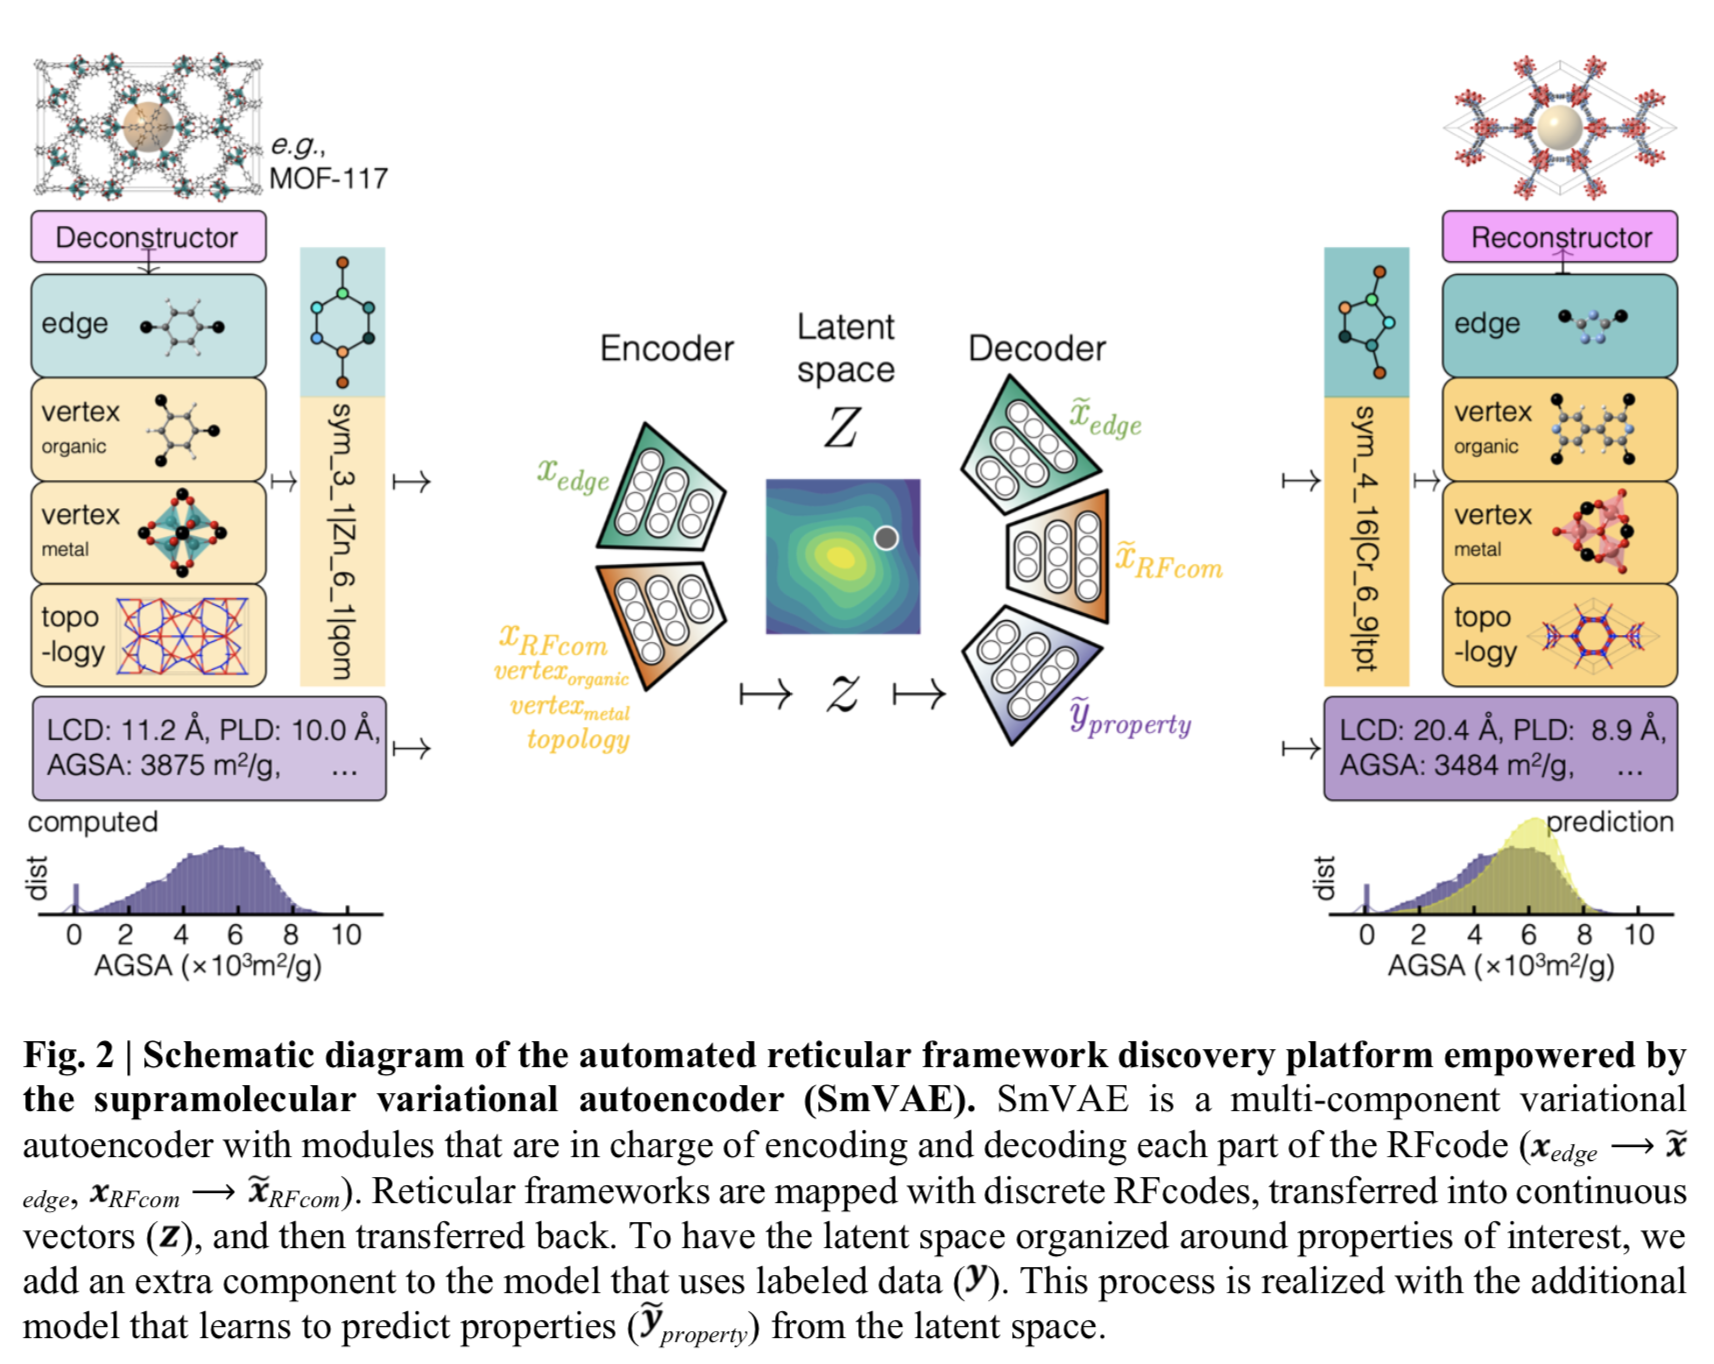


In [44]:

#here's our encoder network, mapping inputs to our latent distribution parameters
#original_dim --> original dimensions (In encoder you have 2 layers of encoding) 28**2 = 784 to 64 then to 2
original_dim = 28 * 28
intermediate_dim = 64
latent_dim = 2

inputs = keras.Input(shape=(original_dim,))

#Intermediate layer in the input
h = layers.Dense(intermediate_dim, activation='relu')(inputs)

#Now encoding to 2-D latent space
z_mean = layers.Dense(latent_dim)(h)
z_log_sigma = layers.Dense(latent_dim)(h)
print(z_mean,z_log_sigma)

KerasTensor(type_spec=TensorSpec(shape=(None, 2), dtype=tf.float32, name=None), name='dense_10/BiasAdd:0', description="created by layer 'dense_10'") KerasTensor(type_spec=TensorSpec(shape=(None, 2), dtype=tf.float32, name=None), name='dense_11/BiasAdd:0', description="created by layer 'dense_11'")


We can use these parameters to sample new similar points from the latent space:

In [47]:
#Sampling new points in the 2-D latent distribution space
from keras import backend as K

#function sampling takes the 2 variables as input
def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim),
                              mean=0., stddev=0.1)
    return z_mean + K.exp(z_log_sigma) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_sigma])
#print(type(z))

Finally, we can map these sampled latent points back to reconstructed inputs:

In [49]:
# Create encoder type --> functional 'keras.engine.functional.Functional'
encoder = keras.Model(inputs, [z_mean, z_log_sigma, z], name='encoder')

# Create decoder
latent_inputs = keras.Input(shape=(latent_dim,), name='z_sampling')
x = layers.Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = layers.Dense(original_dim, activation='sigmoid')(x)
decoder = keras.Model(latent_inputs, outputs, name='decoder')

# instantiate VAE model --> the generator that will model construct point from latent space to 28*28 space
outputs = decoder(encoder(inputs)[2])
vae = keras.Model(inputs, outputs, name='vae_mlp')

What we've done so far allows us to instantiate 3 models:

*   an end-to-end autoencoder mapping inputs to reconstructions
*   an encoder mapping inputs to the latent space
*   a generator that can take points on the latent space and will output the corresponding reconstructed samples

We train the model using the end-to-end model, with a custom loss function: the sum of a reconstruction term, and the KL divergence regularization term.





In [51]:
#Reconstruction loss is the cross entropy loss
reconstruction_loss = keras.losses.binary_crossentropy(inputs, outputs)
reconstruction_loss *= original_dim

#KL loss function --> tried to make the distribution normal with mean =1 and sigma = 0
kl_loss = 1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5

#Total loss = reconstruction + KL divergence loss
vae_loss = K.mean(reconstruction_loss + kl_loss)

#adding the loss function to the vae instant
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')

We will train our VAE on MNIST digits:

In [52]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

vae.fit(x_train, x_train,
        epochs=100,
        batch_size=32,
        validation_data=(x_test, x_test))

Epoch 1/100
1875/1875 [==============================] - 10s 4ms/step - loss: 221.1581 - val_loss: 169.8140
Epoch 2/100
1875/1875 [==============================] - 8s 4ms/step - loss: 169.1292 - val_loss: 164.7996
Epoch 3/100
1875/1875 [==============================] - 8s 4ms/step - loss: 164.5841 - val_loss: 162.0555
Epoch 4/100
1875/1875 [==============================] - 8s 4ms/step - loss: 161.9596 - val_loss: 160.2894
Epoch 5/100
1875/1875 [==============================] - 8s 4ms/step - loss: 160.0632 - val_loss: 158.5593
Epoch 6/100
1875/1875 [==============================] - 8s 4ms/step - loss: 158.0162 - val_loss: 157.6271
Epoch 7/100
1875/1875 [==============================] - 8s 4ms/step - loss: 157.5627 - val_loss: 156.5874
Epoch 8/100
1875/1875 [==============================] - 8s 4ms/step - loss: 156.3449 - val_loss: 156.1992
Epoch 9/100
1875/1875 [==============================] - 8s 4ms/step - loss: 155.6569 - val_loss: 155.4421
Epoch 10/100
1875/1875 [============

Because our latent space is two-dimensional, there are a few visualizations that can be done at this point. One is to look at the neighborhoods of different classes on the latent 2D plane:

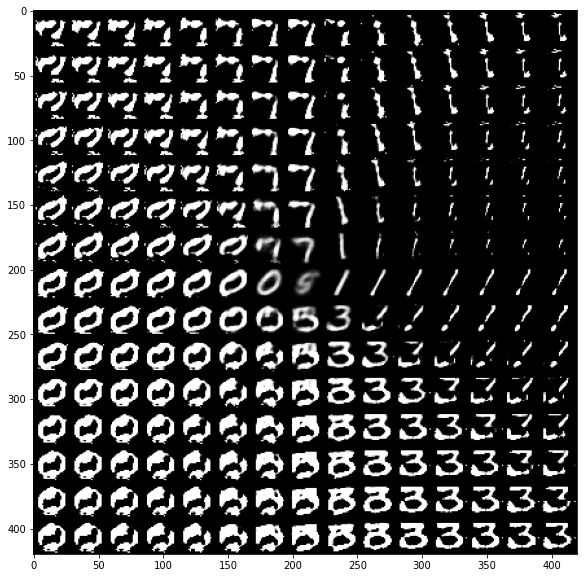

In [53]:
# Display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# We will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()